In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('second_hand_cars.csv')
df.sample(4)

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
1626,Nissan,Elantra,NaN,CNG,Needs Replacement,2019,Third,23-854-1941,128423,969047,Automatic,Maroon,No Service Record,No Current Insurance,Available,NaN
1215,Toyota,Elantra,NaN,Diesel,Needs Replacement,2023,Third,27-961-3312,156380,400191,Automatic,Grey,No Service Record,No Current Insurance,Available,"Sunroof, GPS, Leather Seats"
1872,Nissan,Swift,SE,Petrol,Used,2020,Third,95-331-4870,163940,212108,Manual,Maroon,Major Service at 147510 km,Valid Until [date],Available,"Music System, GPS, Sunroof"
1425,Hyundai,Swift,SE,CNG,Used,2022,Third,67-231-7442,65541,810846,Manual,Red,No Service Record,Valid Until [date],Not Available,NaN


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64

In [3]:
# Handle missing values
df = df.dropna()  # This can be customized based on specific requirements

# Identify numeric columns for outlier detection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from numeric columns
df_cleaned = remove_outliers_iqr(df, numeric_columns)

# Display the shape before and after cleaning
df.shape, df_cleaned.shape


((1814, 16), (1814, 16))

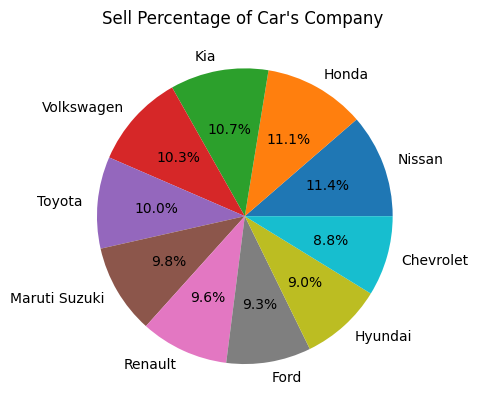

In [4]:
Brand = df['Company Name'].value_counts()
plt.pie(Brand, labels=Brand.index,autopct='%1.1f%%')
plt.title("Sell Percentage of Car's Company ")
plt.show()

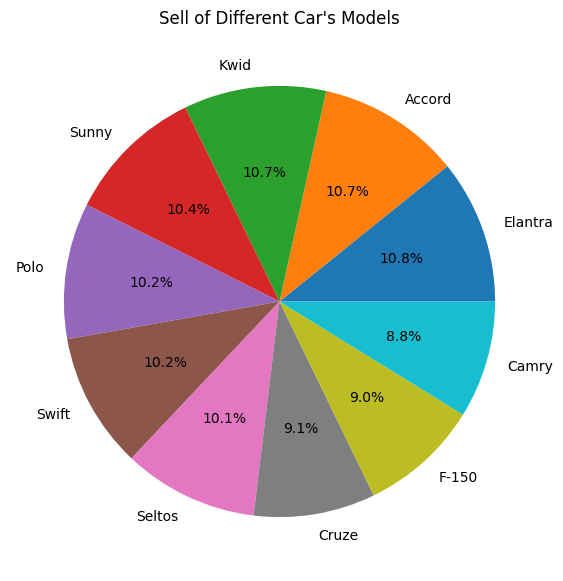

In [ ]:
cars_quantity = []
cars=list(set(df['Car Name']))
for x in df['Car Name'].value_counts():
    cars_quantity.append(x)

df['Car Name'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(cars_quantity, labels=cars,autopct='%1.1f%%')
plt.title("Sell of Different Car's Models")
plt.show()

Variant
SL          32
XL          28
Highline    27
EX          26
LE          25
RXE         24
ZXI         23
SE          20
GT          18
Name: count, dtype: int64


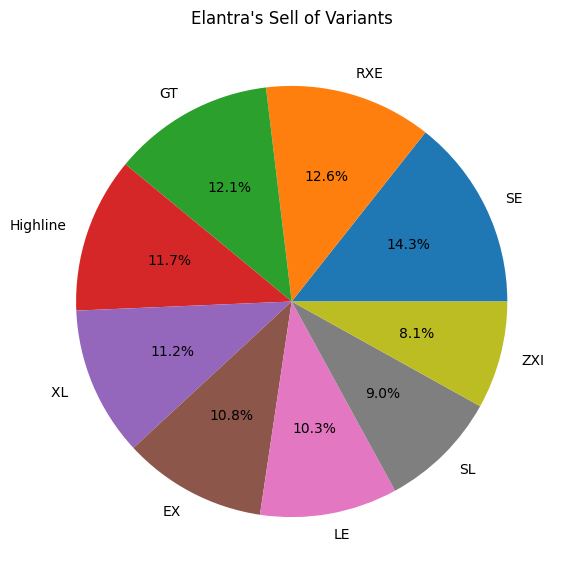

Variant
ZXI         42
XL          32
Highline    26
SL          23
LE          23
RXE         22
GT          22
SE          19
EX          17
Name: count, dtype: int64


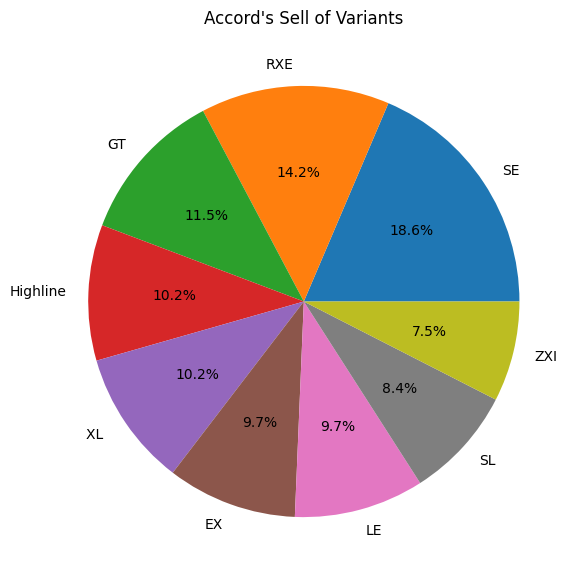

Variant
Highline    25
ZXI         25
GT          24
SE          22
LE          21
EX          20
SL          19
XL          18
RXE         17
Name: count, dtype: int64


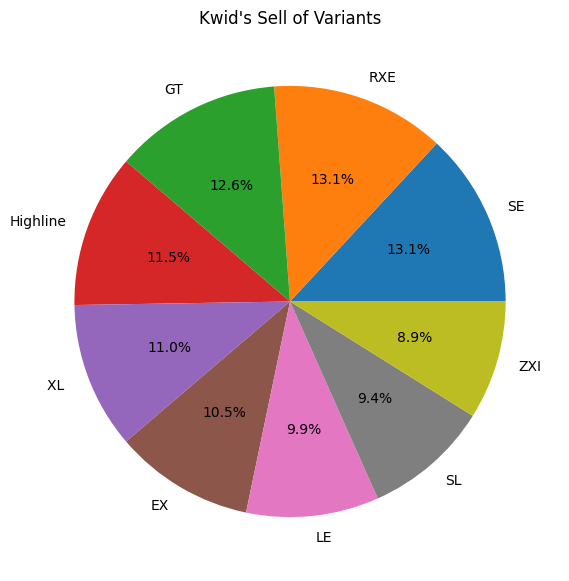

Variant
SE          29
ZXI         29
XL          29
LE          27
RXE         27
Highline    27
SL          24
GT          22
EX          20
Name: count, dtype: int64


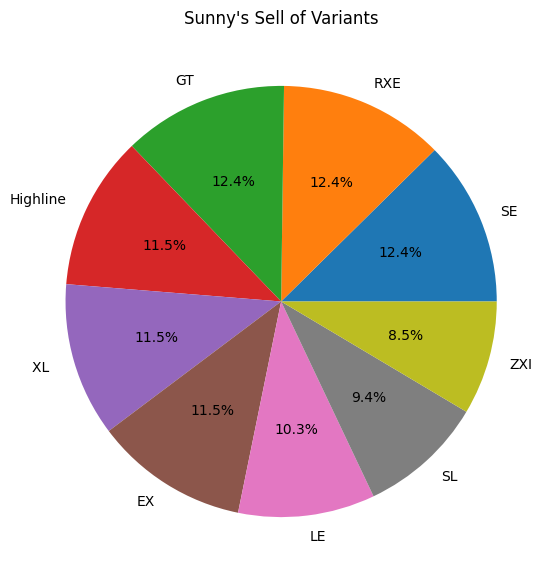

Variant
EX          38
RXE         34
GT          26
LE          26
SE          24
SL          24
Highline    20
XL          19
ZXI         16
Name: count, dtype: int64


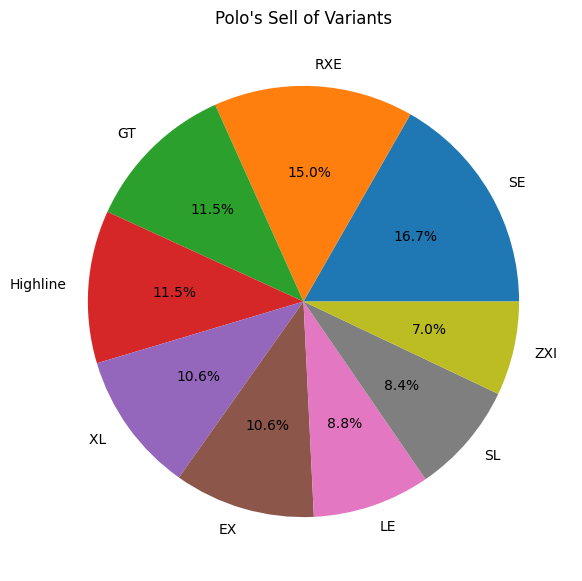

Variant
LE          35
SE          32
GT          30
RXE         29
XL          29
ZXI         26
SL          24
Highline    22
EX          18
Name: count, dtype: int64


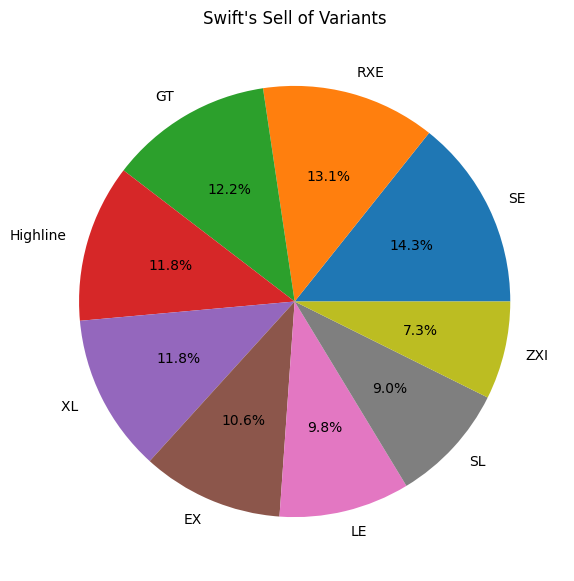

Variant
Highline    33
EX          32
SE          28
RXE         27
LE          27
XL          26
GT          23
ZXI         22
SL          21
Name: count, dtype: int64


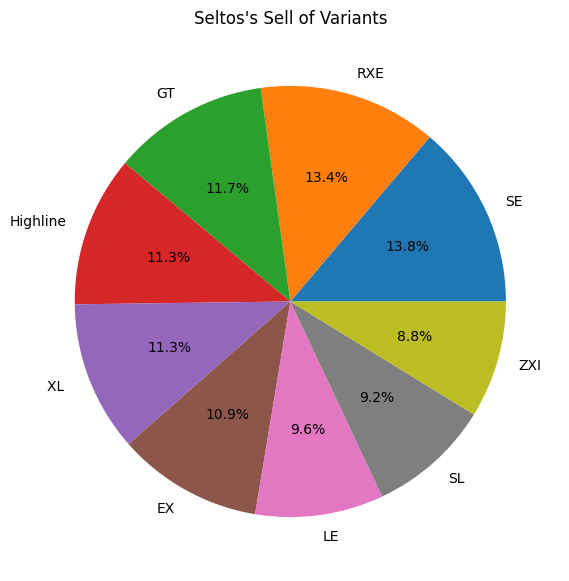

Variant
LE          38
GT          31
SL          27
EX          25
RXE         22
Highline    21
ZXI         16
SE          16
XL          12
Name: count, dtype: int64


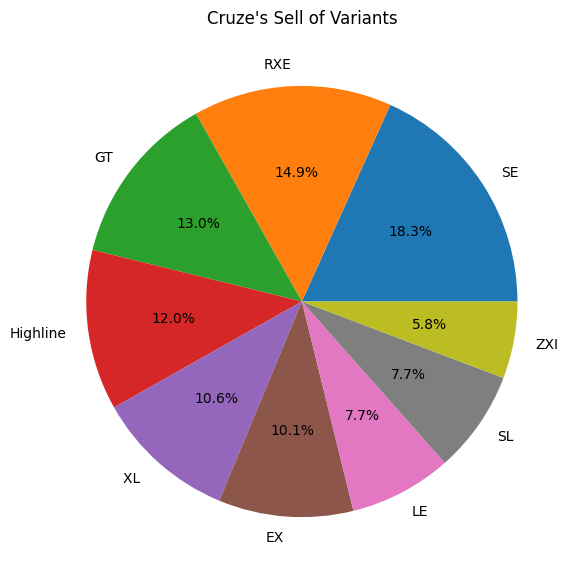

Variant
SE          39
RXE         34
GT          31
Highline    31
XL          27
EX          23
LE          22
SL          21
ZXI         19
Name: count, dtype: int64


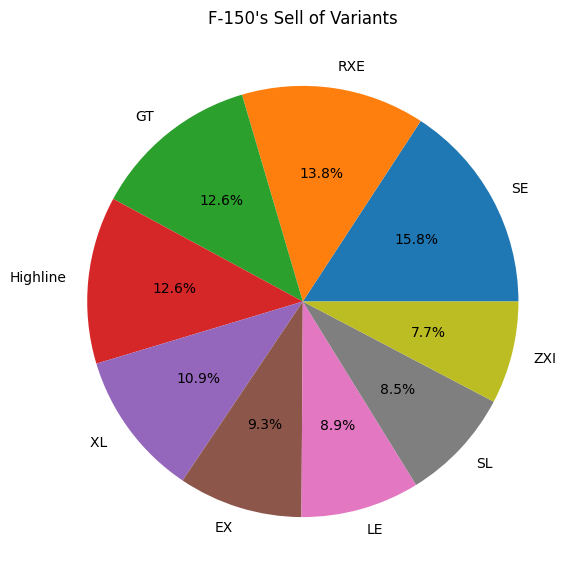

Variant
GT          34
ZXI         27
LE          26
Highline    22
EX          22
SE          21
RXE         19
XL          14
SL          13
Name: count, dtype: int64


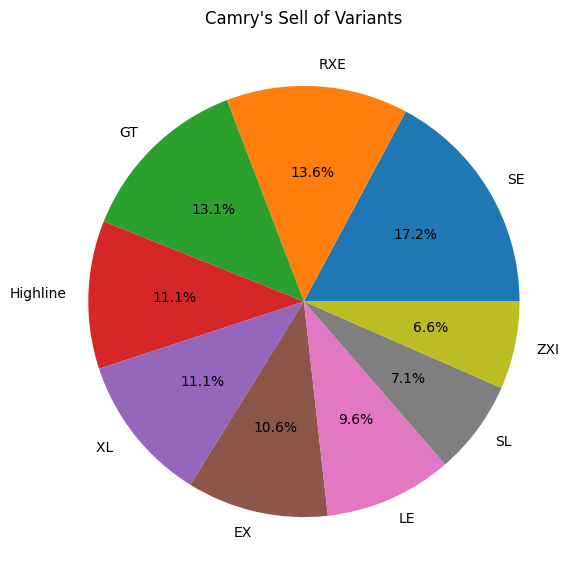

In [ ]:
variant = ['SE','RXE','GT','Highline','XL ','EX','LE','SL','ZXI']

for x in range(len(cars)):
    # print(f'{df[df['Car Name'] == cars[x]]['Variant'].value_counts()}')
    print(f"{df[df['Car Name'] == cars[x]]['Variant'].value_counts()}")
    fig = plt.figure(figsize=(10, 7))
    plt.pie(df[df['Car Name'] == cars[x]]['Variant'].value_counts(), labels=variant,autopct='%1.1f%%')
    plt.title(f"{cars[x]}'s Sell of Variants")
    plt.show()

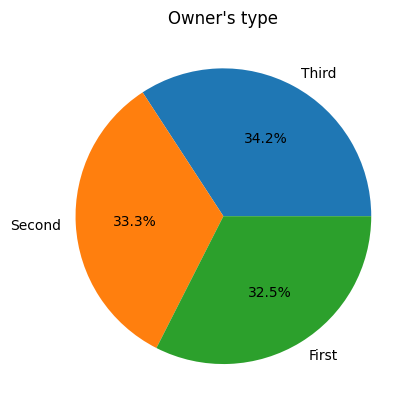

In [ ]:
owner = df['Owner Type'].value_counts()
plt.pie(owner,labels=owner.index,autopct='%1.1f%%')
plt.title("Owner's type")
plt.show()

In [ ]:
df['Variant'].fillna('Unknown', inplace=True)
df['Accessories'].fillna('None', inplace=True)


df['Make Year'] = df['Make Year'].astype(int)
df['Mileage'] = df['Mileage'].astype(int)
df['Price'] = df['Price'].astype(int)

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
Cluster                      int32
dtype: object














Text(0.5, 1.0, 'Correlation Heatmap')

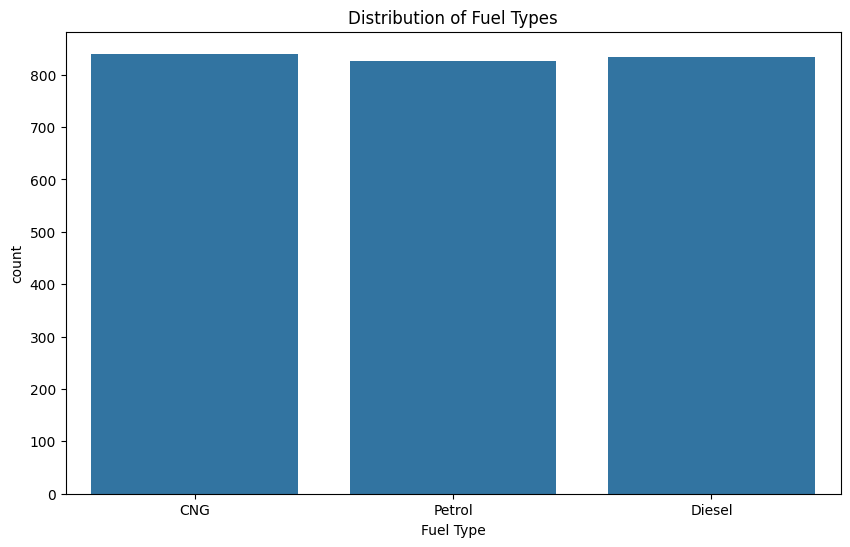

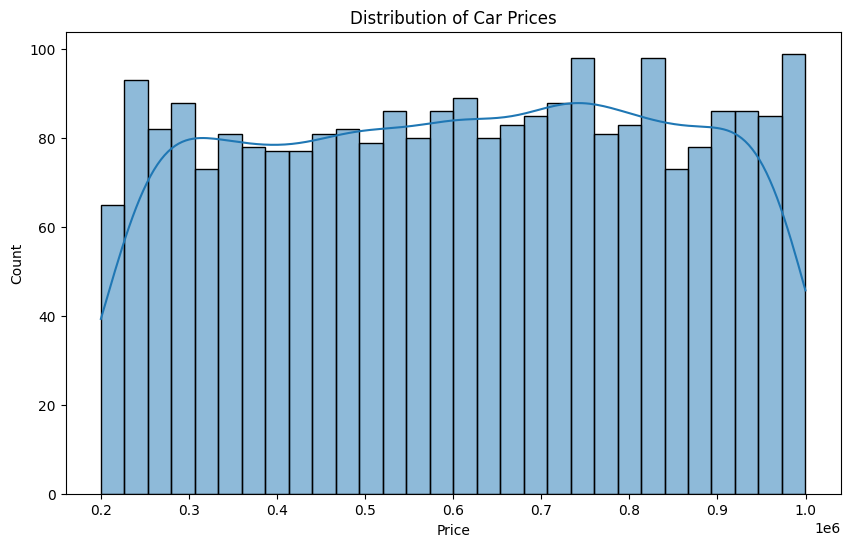

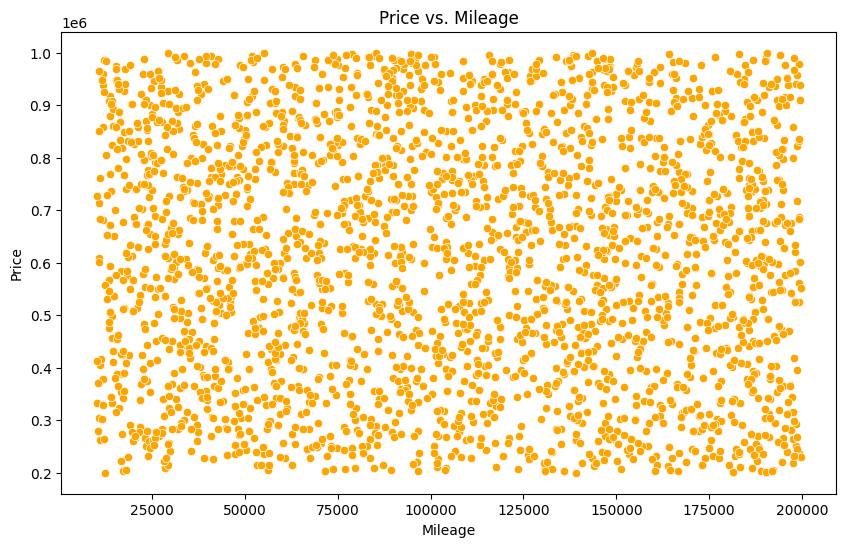

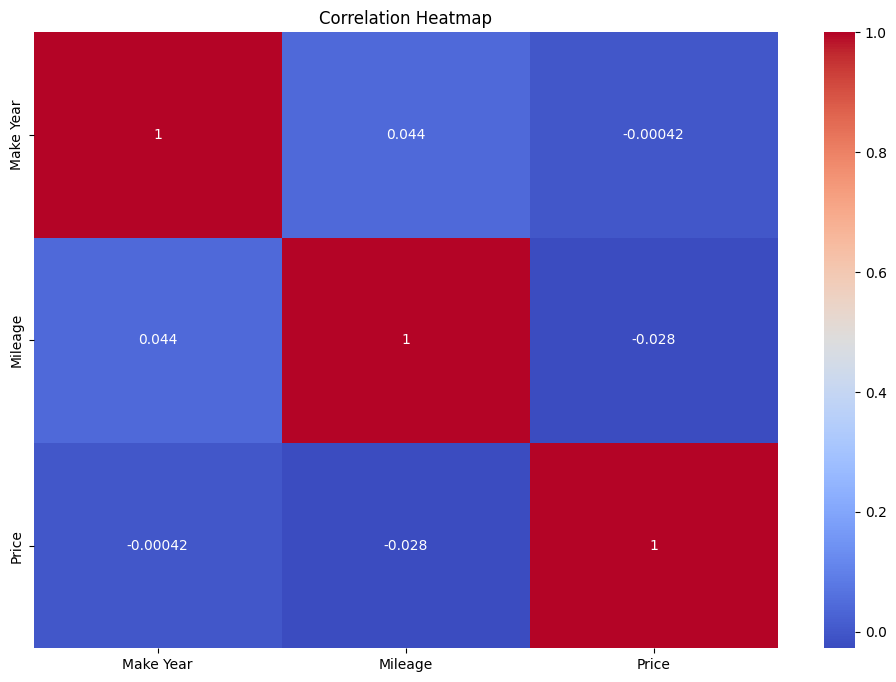

In [ ]:
import seaborn as sns

print(df.dtypes)

plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type', data=df)
plt.title('Distribution of Fuel Types')

# plt.show()
print('''


''')
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
# plt.show()
print('''


''')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df,color='orange')
plt.title('Price vs. Mileage')
# plt.show()
print('''


''')
plt.figure(figsize=(12, 8))
numeric_columns = ['Make Year', 'Mileage', 'Price']
numeric_df = df[numeric_columns]

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Mileage', 'Price']])


wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df_scaled)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[4999.999999999995,
 3111.40779114869,
 1961.7933455019029,
 1246.8970254951014,
 1058.716648034422,
 892.5272692414267,
 751.6121146663704,
 628.2182714172255,
 545.4201665738697,
 491.1986213065466]

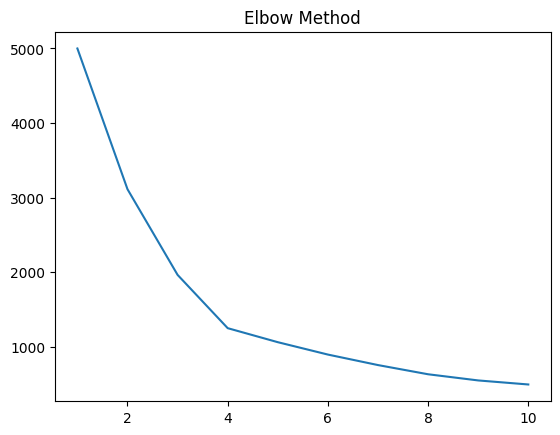

In [ ]:
plt.title("Elbow Method")
plt.plot(range(1,11),wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


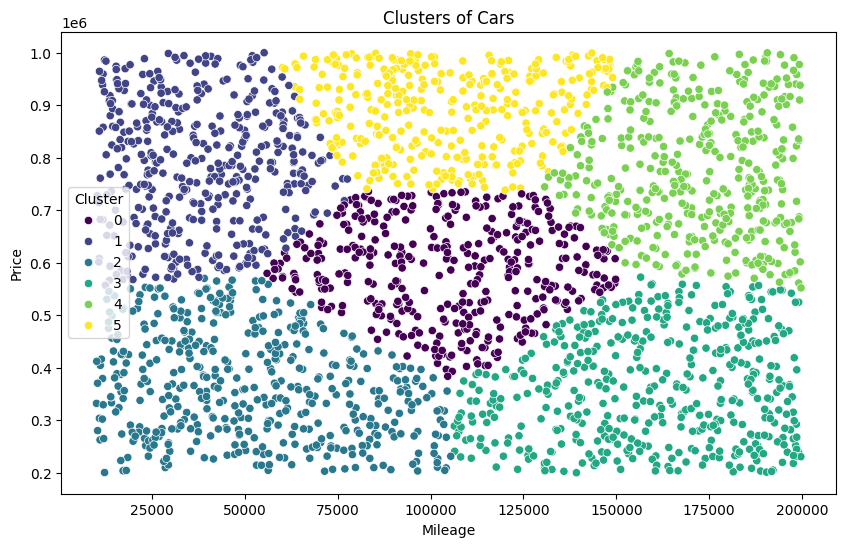

In [ ]:
kmeans = KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Cars')

plt.show()

In [ ]:
average_price_by_fuel = df.groupby('Fuel Type')['Price'].mean()
print(average_price_by_fuel)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Mileage', 'Make Year']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred

Fuel Type
CNG       608814.659524
Diesel    601408.979592
Petrol    614176.844015
Name: Price, dtype: float64


array([615722.34535501, 610820.8889521 , 611535.76956023, 600032.67472487,
       596386.25357253, 597555.22691041, 613001.16353671, 609967.8625108 ,
       608938.34715651, 596458.54154949, 611711.53810255, 611292.74499252,
       602818.04811389, 613771.81622885, 606728.66509134, 610040.48391975,
       613937.07983971, 609070.5902075 , 610844.02799789, 610869.952156  ,
       609913.30533242, 607010.97836221, 610640.06688064, 602257.60339621,
       610434.72946327, 601673.93390546, 608465.80296603, 600116.29560027,
       612296.47629709, 611101.98760882, 596375.93132162, 612445.10606715,
       611954.46571698, 612203.79123155, 607765.53519514, 607273.59392057,
       607842.2961475 , 600411.31836119, 601274.23695961, 607846.79070045,
       600062.43721499, 608646.48551206, 602495.94008737, 608243.88550601,
       599084.56504436, 610223.65007522, 602769.77001333, 610586.30515716,
       610157.8566602 , 609863.44667362, 611932.4987132 , 596345.73873771,
       611737.06409599, 6

In [9]:
insights = {
    "Total cars analyzed": len(df_cleaned),
    "Average price": df_cleaned['Price'].mean(),
    "Average mileage": df_cleaned['Mileage'].mean(),
    "Price distribution insights": "The majority of cars are priced within a specific range, with few very expensive or very cheap cars.",
    "Correlation insights": "Price is moderately negatively correlated with mileage, indicating that higher mileage cars tend to be cheaper.",
    "Other patterns": "Certain car brands/models might show distinct pricing patterns, which can be further analyzed."
}

# Display insights
insights

{'Total cars analyzed': 1814,
 'Average price': 609941.1052921719,
 'Average mileage': 105207.43605292172,
 'Price distribution insights': 'The majority of cars are priced within a specific range, with few very expensive or very cheap cars.',
 'Correlation insights': 'Price is moderately negatively correlated with mileage, indicating that higher mileage cars tend to be cheaper.',
 'Other patterns': 'Certain car brands/models might show distinct pricing patterns, which can be further analyzed.'}